In [1]:
import sys, os, glob, scipy, sqlite3, json, matplotlib#, pymer4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import matplotlib.ticker as mtick

## Functions with stats

In [2]:
def ttest_1samp(dat, popmean = .5, verbose = True):
    if verbose:
        print('SD: ',np.std(dat))
        print('Stats:')
    stats = scipy.stats.ttest_1samp(dat, popmean = popmean)
    if verbose:
        print(stats)
        print('Cohen d:')
    coh_d = (np.mean(dat) - popmean)/np.std(dat)
    if verbose:
        print(coh_d)
    return(stats, coh_d)

In [3]:
def ttest_2samp(dat1, dat2):
    print('SD dat 1: ',np.std(dat1))
    print('SD dat 2: ',np.std(dat2))
    print('Stats:')
    stats = scipy.stats.ttest_ind(dat1, dat2)
    print(stats)
    print('Cohen d:')
    nx = len(dat1)
    ny = len(dat2)
    dof = nx + ny - 2
    coh_d = ((np.mean(dat1) - np.mean(dat2)) /
             np.sqrt(((nx-1)*np.std(dat1, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof))
    print(coh_d)
    return(stats, coh_d)

## Design

In [4]:
sns.set(palette = 'tab10', style = 'white', font = 'arial', context = 'notebook')

### Load data

In [5]:
a = !pwd
baseDir = '/'.join(a[0].split('/')[0:-2])
print(baseDir)
sys.path.append('/'.join(a[0].split('/')[:4])+'/Python')
import FigureTools

/Users/jeroen/Dropbox (Brown)/Postdoc FHL/JEROEN/SOC_STRUCT_LEARN/Code_share/NHB_motives_structure/Study3_NewPlayerTypes


In [6]:
gameDat = pd.read_csv(baseDir+'/Data/Cleaned/gameDat_study4.csv',index_col=0)
gameDat = gameDat.rename(columns = {'ConfidenceNum':'Confidence','ScoreNum':'Score'})
gameDat.head()

,sub,subID,worker,assignment,Block,Player,Type,Variant,Type_Total,Trial,...,GameType,Colors,CorrAns,GivenAns,Confidence,Score,ScoreCumulBlock,RT_radio,RT_submit,SelfReport
0,1,6001,AQT5PKG39SJJM,3KAKFY4PGVUG37QYGCWJI5QD8KEI3D,0,n.a.,pess,nat,pess_nat,0,...,SG,n.a.,coop,coop,50.0,1,1,34851.0,38989.0,n.a.
1,1,6001,AQT5PKG39SJJM,3KAKFY4PGVUG37QYGCWJI5QD8KEI3D,0,n.a.,pess,nat,pess_nat,1,...,PD,n.a.,def,def,50.0,1,2,20870.0,24642.0,n.a.
2,1,6001,AQT5PKG39SJJM,3KAKFY4PGVUG37QYGCWJI5QD8KEI3D,0,n.a.,pess,nat,pess_nat,2,...,SH,n.a.,def,def,50.0,1,3,7268.0,9664.0,n.a.
3,1,6001,AQT5PKG39SJJM,3KAKFY4PGVUG37QYGCWJI5QD8KEI3D,0,n.a.,pess,nat,pess_nat,3,...,HG,n.a.,coop,coop,70.0,1,4,8997.0,11736.0,n.a.
4,1,6001,AQT5PKG39SJJM,3KAKFY4PGVUG37QYGCWJI5QD8KEI3D,0,n.a.,pess,nat,pess_nat,4,...,SG,n.a.,coop,coop,60.0,1,5,5880.0,8617.0,n.a.


##### Exclude workers with no survey data, as these did not reach the end of the experiment

In [8]:
workers_nosurvey = pd.read_csv(baseDir+'/Data/Cleaned/workers_without_survey.csv',index_col=0)['worker'].tolist()
workers_nosurvey

['AQT5PKG39SJJM',
 'A3HE29W5IDR394',
 'A2GXLM74C7BDI8',
 'AC75J5UN6DOKB',
 'A1TLNLB9D87H6']

In [9]:
[i for i in range(153) if gameDat['worker'].unique()[i] in workers_nosurvey]

[0, 15, 22, 41, 119]

In [12]:
gameDat = gameDat.loc[~gameDat['worker'].isin(workers_nosurvey),:].copy().reset_index(drop=True)

In [13]:
print('%i participants found'%len(gameDat['subID'].unique()))

148 participants found


In [14]:
gtOrder = ['HG','SG','SH','PD']
# roundOrder = range(4)
ptOrder = ['trust','opt','pess','env']
# ptLong = ['Trustful','Optimist','Pessimist','Envious']
ptLong = ['Cooperative','Greedy','Risk-Averse','Envious']

## Overall performance by player type

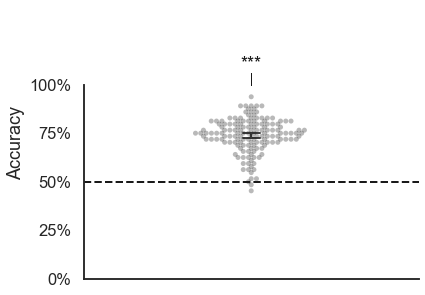

In [15]:
sns.set(context = 'talk', style = 'white', font = 'arial')
overallDat = gameDat[['subID','Type_Total','Type','Variant','Confidence','Score']
                  ].groupby(['subID']).mean().reset_index()
fig, ax = plt.subplots(1,1,figsize=[6,5])
sns.barplot(data=overallDat,y='Score', ax=ax, errwidth = 2, capsize=.05,
            alpha=0)
sns.swarmplot(data=overallDat,y='Score', ax=ax,
            alpha=.3, color = 'k')
ax.plot([-5,5],[.5,.5], 'k--', lw=2)
ax.set(xlabel = None, yticks = [0,.25,.5,.75,1],
       ylabel = 'Accuracy');
stats = scipy.stats.ttest_1samp(overallDat['Score'].values, 0.5)
FigureTools.add_sig_markers(ax, relationships=[[0,0,stats[1]]])
sns.despine(top=True,right=True)
ax.spines['left'].set_bounds(0,1)
ax.set_ylim([0,1.4])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

In [16]:
overallDat['Score'].describe()

count    148.000000
mean       0.737542
std        0.088218
min        0.453125
25%        0.703125
50%        0.750000
75%        0.796875
max        0.937500
Name: Score, dtype: float64

In [17]:
ttest_1samp(overallDat['Score'].values);

SD:  0.08791977199621336
Stats:
Ttest_1sampResult(statistic=32.757665431271505, pvalue=1.9665640491865558e-69)
Cohen d:
2.7018067078240433


In [18]:
scipy.stats.wilcoxon(overallDat['Score'].values-0.5)

WilcoxonResult(statistic=6.5, pvalue=7.651285940303821e-26)

##### All conditions

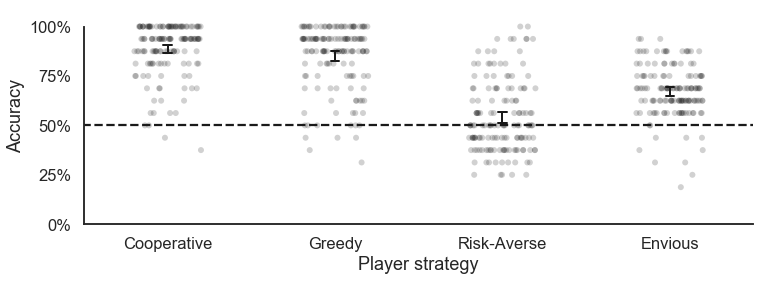

In [19]:
sns.set_context('talk')
# sns.set_palette('tab10',4)
blockDat = gameDat[['subID','Type','Confidence','Score']
                  ].groupby(['subID','Type']).mean().reset_index()
fig, ax = plt.subplots(1,1,figsize=[12,4])
# sns.barplot(data=blockDat,x='Type',y='Score', ax=ax,
#             order=ptOrder,alpha=.5, errwidth = 0, zorder = 1)
sns.stripplot(data=blockDat,x='Type',y='Score', ax=ax,
            order=ptOrder, size=6, jitter = 0.2, color = 'k',
              linewidth =0, alpha = .2, zorder = 2)
# sns.swarmplot(data=blockDat,x='Type',y='Score', ax=ax,
#             order=ptOrder, color = 'k', alpha = .3, zorder = 2)
sns.barplot(data=blockDat,x='Type',y='Score', ax=ax,
            order=ptOrder,alpha=0, zorder = 3, errwidth = 2, capsize = .05, errcolor = 'k')
ax.plot([-5,5],[.5,.5], 'k--');
ax.set(ylim = [0,1.1], xlim = [-.5,3.5], yticks = np.arange(0,1.1,.25),
       ylabel = 'Accuracy', xlabel = 'Player strategy',
      xticklabels = ptLong);
sns.despine(top=True,right=True)
ax.spines['left'].set_bounds(0,1)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

In [20]:
for pt in ptOrder:
    scores = blockDat.query('Type == @pt')['Score']
    print(pt)
    print(scores.describe())
    print(ttest_1samp(scores))
    print('\n\n')

trust
count    148.000000
mean       0.887247
std        0.131558
min        0.375000
25%        0.812500
50%        0.937500
75%        1.000000
max        1.000000
Name: Score, dtype: float64
SD:  0.131112939975912
Stats:
Ttest_1sampResult(statistic=35.809705486117, pvalue=1.7228538329868728e-74)
Cohen d:
2.953534728858695
(Ttest_1sampResult(statistic=35.809705486117, pvalue=1.7228538329868728e-74), 2.953534728858695)



opt
count    148.000000
mean       0.850084
std        0.161331
min        0.312500
25%        0.796875
50%        0.906250
75%        0.937500
max        1.000000
Name: Score, dtype: float64
SD:  0.16078550203266775
Stats:
Ttest_1sampResult(statistic=26.398826022299595, pvalue=1.1857745357805416e-57)
Cohen d:
2.177338472894967
(Ttest_1sampResult(statistic=26.398826022299595, pvalue=1.1857745357805416e-57), 2.177338472894967)



pess
count    148.000000
mean       0.540963
std        0.182358
min        0.250000
25%        0.375000
50%        0.500000
75%        0.68